# Quant Project 2 : Linear Regression model for prediction the stock price and testing all the assumptions.

# step 1: Download the data from Yahoo Finance
# step 2: Some Feature Engineering (to build new fatures) -Technical Indiactors
# step 3: Run Linear Regression Model
# step 4: Check how the model has performed (Actual vs Predicted)
# step 5: Test for all the assumptions
# step 6: Check the prediction

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
# Step 1: Download the data from yahoo finance
tickers = ["AAPL", "AMZN", "MSFT", "QQQ", "^GSPC"]
start_date = '2020-01-01'
end_date = '2024-01-01'

df = yf.download(tickers, start = start_date, end = end_date)['Close']
df

/tmp/ipython-input-3-822131476.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = start_date, end = end_date)['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.620842,94.900497,153.042282,209.091064,3257.850098
2020-01-03,71.914818,93.748497,151.136642,207.175812,3234.850098
2020-01-06,72.487846,95.143997,151.527313,208.510681,3246.280029
2020-01-07,72.146950,95.343002,150.145721,208.481659,3237.179932
2020-01-08,73.307518,94.598503,152.537323,210.048691,3253.050049
...,...,...,...,...,...
2023-12-22,192.192551,153.419998,370.375732,404.695343,4754.629883
2023-12-26,191.646545,153.410004,370.454865,407.172821,4774.750000
2023-12-27,191.745819,153.339996,369.871552,408.001740,4781.580078


In [ ]:
# step 2: Some feature engineering
# Lesson: to predict the APPL stock price, we have to consider yesterday's stock price (all stocks)
# The market is not open yet so we don't know what's the price today

# Considering Yesterday's value.
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

# Moving Avg (MA): Technical Indicator - It helps you understand short term trend

df['AAPL_MA_5'] = df['AAPL'].rolling(window = 5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window = 5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window = 5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window = 5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window = 5).mean()

# Set Y Variable
df['Target'] = df['AAPL'].shift(-1)
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-02,72.620842,94.900497,153.042282,209.091064,3257.850098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.914818
2020-01-03,71.914818,93.748497,151.136642,207.175812,3234.850098,72.620842,94.900497,153.042282,209.091064,3257.850098,NaN,NaN,NaN,NaN,NaN,72.487846
2020-01-06,72.487846,95.143997,151.527313,208.510681,3246.280029,71.914818,93.748497,151.136642,207.175812,3234.850098,NaN,NaN,NaN,NaN,NaN,72.146950
2020-01-07,72.146950,95.343002,150.145721,208.481659,3237.179932,72.487846,95.143997,151.527313,208.510681,3246.280029,NaN,NaN,NaN,NaN,NaN,73.307518
2020-01-08,73.307518,94.598503,152.537323,210.048691,3253.050049,72.146950,95.343002,150.145721,208.481659,3237.179932,72.495595,94.746899,151.677856,208.661581,3245.842041,74.864616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,192.192551,153.419998,370.375732,404.695343,4754.629883,193.264679,153.839996,369.347412,404.090881,4746.750000,193.768997,153.447998,368.744263,403.420966,4741.732031,191.646545
2023-12-26,191.646545,153.410004,370.454865,407.172821,4774.750000,192.192551,153.419998,370.375732,404.695343,4754.629883,193.205127,153.315997,369.141760,404.174115,4748.570020,191.745819
2023-12-27,191.745819,153.339996,369.871552,408.001740,4781.580078,191.646545,153.410004,370.454865,407.172821,4774.750000,192.452640,153.225998,369.301953,404.680798,4751.212012,192.172699


In [ ]:
df.columns

Index(['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC', 'AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [ ]:
!pip install --upgrade scipy

In [ ]:
import statsmodels.api as sm

In [ ]:
# Set X and Y for Linear Regression Model -Ordinary least Square (OLS)

X = df[['AAPL(t-1)', 'AMZN(t-1)','MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5', 'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']
df = df.dropna()
df
X_const = sm.add_constant(X) #Intercept Term

# Train the model
model = sm.OLS(Y, X_const).fit()

#Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9109.
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:31:28   Log-Likelihood:                -2657.8
No. Observations:                1001   AIC:                             5338.
Df Residuals:                     990   BIC:                             5392.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4013      1.333      1.051      0.293      -1.214       4.017
AAPL(t-1)      0.3084      0.101      3.038      0.002       0.109       0.508
AMZN(t-1)      0.0178      0.077      0.233      0.816      -0.133       0.168
MSFT(t-1)     -0.0422      0.060     -0.699      0.485      -0.161       0.076
QQQ(t-1)       0.1434      0.127      1.132      0.258      -0.105       0.392
^GSPC(t-1)     0.0047      0.008      0.613      0.540      -0.010       0.020
AAPL_MA_5      0.6553      0.102      6.413      0.000       0.455       0.856
AMZN_MA_5     -0.0121      0.078     -0.156      0.876      -0.165       0.141
MSFT_MA_5      0.0759      0.061      1.239      0.216      -0.044       0.196
QQQ_MA_5      -0.1538      0.129     -1.191      0.234      -0.407       0.100
^GSPC_MA_5    -0.0053      0.008     -0.678      0.498      -0.021       0.010
==============================================================================
Omnibus:                       20.549   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.541
Skew:                          -0.095   Prob(JB):                     7.05e-09
Kurtosis:                       3.929   Cond. No.                     6.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Set X and Y for Linear Regression Model -Ordinary least Square (OLS)

X = df[['AAPL(t-1)', '^GSPC(t-1)']] # Dropping AAPL_MA_5

Y = df['Target']
df = df.dropna()
df
X_const = sm.add_constant(X) #Intercept Term

# Train the model
model = sm.OLS(Y, X_const).fit()

#Summary
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.211e+04
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:31:31   Log-Likelihood:                -2700.6
No. Observations:                1001   AIC:                             5407.
Df Residuals:                     998   BIC:                             5422.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8201      1.091      0.751      0.453      -1.321       2.962
AAPL(t-1)      0.9899      0.008    130.753      0.000       0.975       1.005
^GSPC(t-1)     0.0002      0.000      0.430      0.667      -0.001       0.001
==============================================================================
Omnibus:                       29.911   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.132
Skew:                          -0.161   Prob(JB):                     8.76e-14
Kurtosis:                       4.157   Cond. No.                     3.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import pandas as pd
df_train_predict =pd.DataFrame()
df_train_predict['Actual'] = df['Target']
df_train_predict['Predicted'] = model.predict(X_const)
df_train_predict

,Actual,Predicted
Date,,
2020-01-08,74.864616,72.906236
2020-01-09,75.033875,74.058317
2020-01-10,76.636940,75.604102
2020-01-13,75.602074,75.769703
2020-01-14,75.278069,77.361223
...,...,...
2023-12-21,192.192551,193.245169
2023-12-22,191.646545,193.107794
2023-12-26,191.745819,192.048182


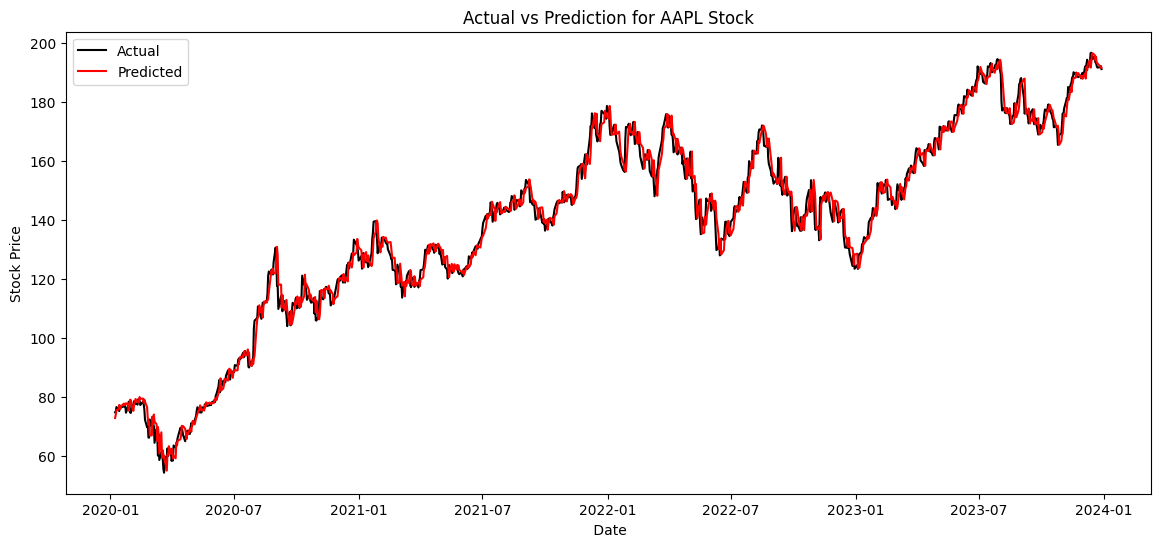

In [ ]:
# Plot between Actual vs Predicted Value

import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(df_train_predict.index, df_train_predict['Actual'], label = 'Actual', color='black')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label = 'Predicted', color='red')
plt.title('Actual vs Prediction for AAPL Stock')
plt.xlabel(" Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

####Catch is: we need to still test LR Assumptions.
####we need to check how the modesl is performing on test data

## Linear Regression (Given the Dataset here)
#### Step 1: Train the model
#### Step 2: Test the model

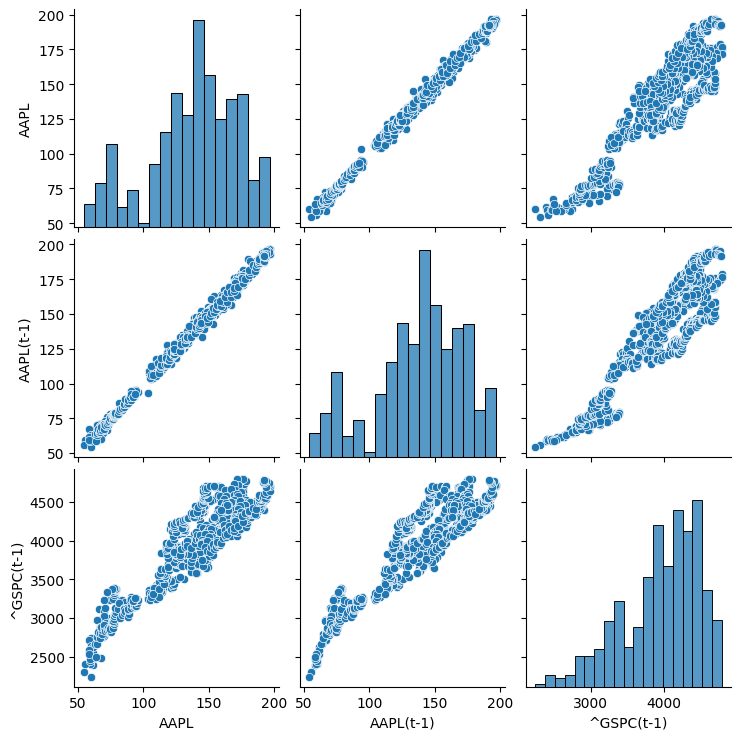

In [ ]:
# Assumptions of Linear Regression:
# 1) Linearity between dependent and independent variable - Met
import seaborn as sns
df = df[['AAPL', 'AAPL(t-1)', '^GSPC(t-1)']]
sns.pairplot(df)
# AAPL & AAPL(t-1) has linear relationship
# AAPL & S&P500 has linear relationship
# AAPL & AAPL_MA_5 has linear relationship

# 2) Homoscedesticity : Fitting Residual with the predicted value.

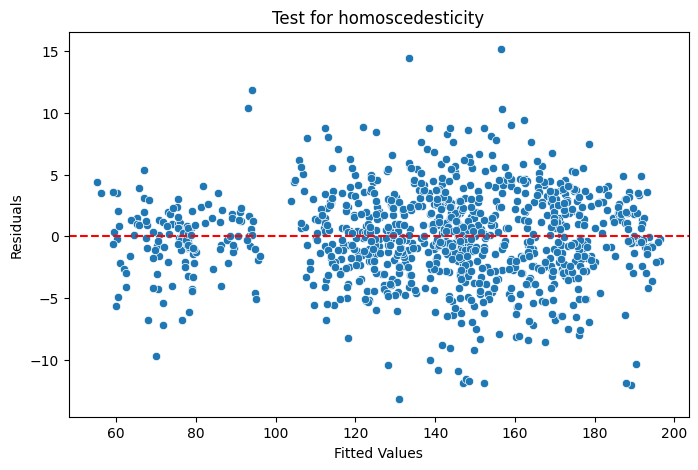

In [ ]:
residual = model.resid # Actual - Predicted
fitted = model.fittedvalues # Predicted Y values

import seaborn as sns
plt.figure(figsize = (8,5))
sns.scatterplot(x = fitted, y = residual)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Test for homoscedesticity')
plt.show()

# Sicne it is a tube like structure => It is Homoscedestic -> Assumption is met
# If it was like a tunnle structure => It is Heteroscedestic -> Assumption is not met

# 3) Multicolliniarity => VIF (Variance Inflation Factor)

#### Rule of thumb for VIF
#### VIF < 1 => No Multicollinearity
#### VIF < 10 => Moderate Multicollinearity
#### VIF > 10 => Strong Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif =vif[1:]
vif

# So in

,Features,VIF
1,AAPL(t-1),4.897478
2,^GSPC(t-1),4.897478


# 4) Assumption: Normality of Residual => 1) Visual Test (hISTOGRAM) 2) QQ Plot


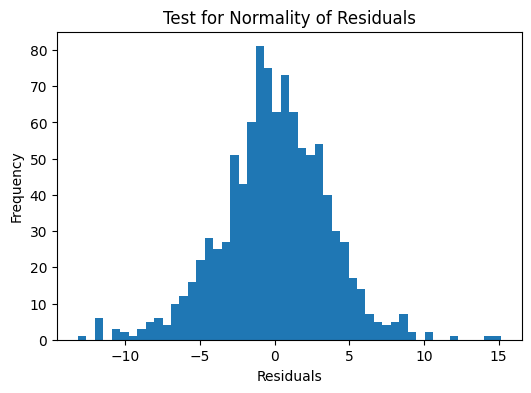

In [ ]:
# Historgram
plt.figure(figsize = (6,4))
plt.hist(residual, bins = 50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Test for Normality of Residuals')
plt.show()

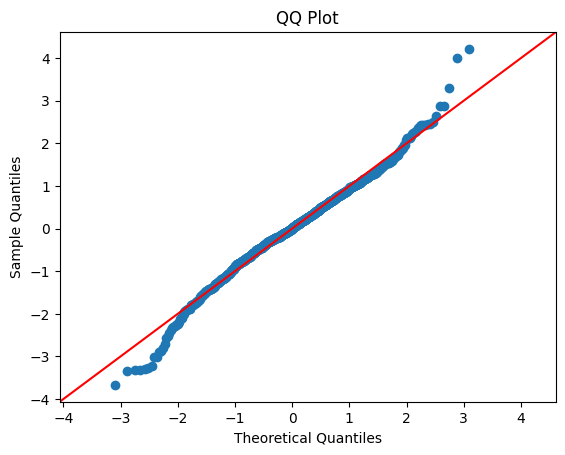

In [ ]:
# QQ Plot (Quantile Quantile plot)

import statsmodels.api as sm

sm.qqplot(residual, line = '45', fit = True)
plt.title('QQ Plot')
plt.show()

# 5) Autocorrrelation :  Burbin Watson Test

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residual)
dw # P value

np.float64(1.0638720759563915)

## So our all the five conditions of our linear regression model is met.

## Linearity
## Homoscedesticity
## VIF
## Normality of Residuals
## Auto Correlation of Residuals

# Predict the stock price for the year 2025

In [ ]:
# Step 1: Download the data from Yahoo Finance
tickers = ['AAPL', '^GSPC']
df = yf.download(tickers, start = '2025-01-01', end = '2025-03-31')['Close']
df.head()

/tmp/ipython-input-20-2471956868.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2025-01-01', end = '2025-03-31')['Close']
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,^GSPC
Date,,
2025-01-02,243.263199,5868.549805
2025-01-03,242.774368,5942.470215
2025-01-06,244.410416,5975.379883
2025-01-07,241.627136,5909.029785
2025-01-08,242.115936,5918.250000


In [ ]:
# step 2: Some feature engineering
# Lesson: to predict the APPL stock price, we have to consider yesterday's stock price (all stocks)
# The market is not open yet so we don't know what's the price today

# Considering Yesterday's value.
# Step 2: Data Eng
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
df = df.dropna()
df.head()


Ticker,AAPL,^GSPC,AAPL(t-1),^GSPC(t-1)
Date,,,,
2025-01-03,242.774368,5942.470215,243.263199,5868.549805
2025-01-06,244.410416,5975.379883,242.774368,5942.470215
2025-01-07,241.627136,5909.029785,244.410416,5975.379883
2025-01-08,242.115936,5918.250000,241.627136,5909.029785
2025-01-10,236.280029,5827.040039,242.115936,5918.250000


In [ ]:
X_test = df[['AAPL(t-1)', '^GSPC(t-1)']]
X_test = sm.add_constant(X_test)
df_result = pd.DataFrame()
df_result['Actual'] = df['AAPL']
df_result['Predicted'] = model.predict(X_test)
df_result.head()

,Actual,Predicted
Date,,
2025-01-03,242.774368,242.831539
2025-01-06,244.410416,242.363003
2025-01-07,241.627136,243.989271
2025-01-08,242.115936,241.220478
2025-01-10,236.280029,241.706230


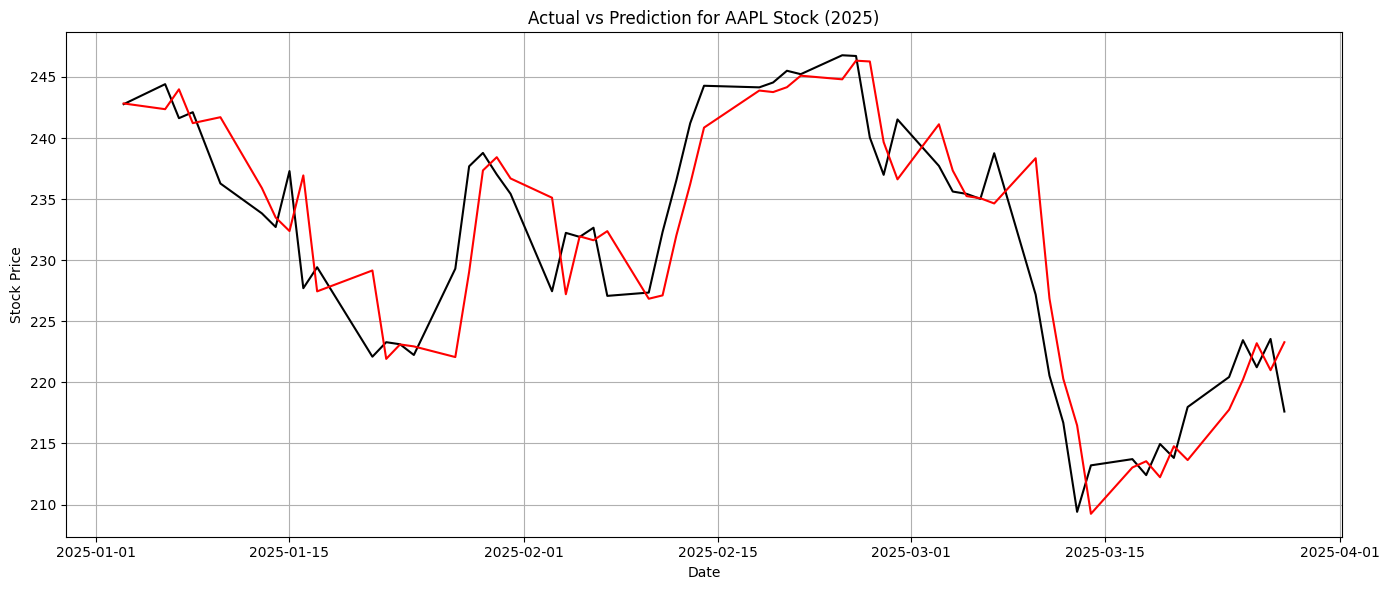

In [ ]:
# Plot between Actual vs Predicted Value
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Risk Metrics
# Calculate rmse and mse
# rmse = root mean square error => Sq root(Avg((A - P)^2))
# mse = mean square error => Avg((A - P)^2)
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate mse
mse = mean_squared_error(df_result['Actual'], df_result['Predicted'])
rmse = np.sqrt(mse)
print(rmse, mse)

4.111330156133766 16.903035652734896


# LASSO Regression


# Download the Data

In [ ]:
# Step 1: Download the data from the Yahoo Finance

tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2024-01-01')['Close']
df.head()

/tmp/ipython-input-25-1512607336.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end = '2024-01-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.620842,94.900497,153.042282,209.091064,3257.850098
2020-01-03,71.914818,93.748497,151.136642,207.175812,3234.850098
2020-01-06,72.487846,95.143997,151.527313,208.510681,3246.280029
2020-01-07,72.146950,95.343002,150.145721,208.481659,3237.179932
2020-01-08,73.307518,94.598503,152.537323,210.048691,3253.050049


# Feature Engineering

In [ ]:
# step 2: Some feature engineering
# Lesson: to predict the APPL stock price, we have to consider yesterday's stock price (all stocks)
# The market is not open yet so we don't know what's the price today

# Considering Yesterday's value.
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

# Moving Avg (MA): Technical Indicator - It helps you understand short term trend

df['AAPL_MA_5'] = df['AAPL'].rolling(window = 5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window = 5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window = 5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window = 5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window = 5).mean()

# Set Y Variable
df['Target'] = df['AAPL'].shift(-1)
df

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-02,72.620842,94.900497,153.042282,209.091064,3257.850098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.914818
2020-01-03,71.914818,93.748497,151.136642,207.175812,3234.850098,72.620842,94.900497,153.042282,209.091064,3257.850098,NaN,NaN,NaN,NaN,NaN,72.487846
2020-01-06,72.487846,95.143997,151.527313,208.510681,3246.280029,71.914818,93.748497,151.136642,207.175812,3234.850098,NaN,NaN,NaN,NaN,NaN,72.146950
2020-01-07,72.146950,95.343002,150.145721,208.481659,3237.179932,72.487846,95.143997,151.527313,208.510681,3246.280029,NaN,NaN,NaN,NaN,NaN,73.307518
2020-01-08,73.307518,94.598503,152.537323,210.048691,3253.050049,72.146950,95.343002,150.145721,208.481659,3237.179932,72.495595,94.746899,151.677856,208.661581,3245.842041,74.864616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,192.192551,153.419998,370.375732,404.695343,4754.629883,193.264679,153.839996,369.347412,404.090881,4746.750000,193.768997,153.447998,368.744263,403.420966,4741.732031,191.646545
2023-12-26,191.646545,153.410004,370.454865,407.172821,4774.750000,192.192551,153.419998,370.375732,404.695343,4754.629883,193.205127,153.315997,369.141760,404.174115,4748.570020,191.745819
2023-12-27,191.745819,153.339996,369.871552,408.001740,4781.580078,191.646545,153.410004,370.454865,407.172821,4774.750000,192.452640,153.225998,369.301953,404.680798,4751.212012,192.172699


# Step 3: LASSO Regression


In [ ]:
# step 1: Import all teh required libraries
# step 2: Define Features and Target Variable
# step 3: Train Test Split
# step 4: Apply LASSO Regression
# step 5: Get Intercept and Coeff for LASSO Regression
# step 6: Predict using LASSO Regression
# step 7: Create a DataFrame with Actual and Predicted Values
# step 8: Plot Actual & Predicted Values
# step 9: Evaluate the Model - R square. mse, rmse

In [ ]:
# Step 1: Import all the required Libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 2: Define Features and Target Variables

X = df[['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [ ]:
# Step 3: Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.044, shuffle = False)

In [ ]:
# Step 4: Apply Ridge Regression

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 10)
lasso.fit(X_train, Y_train)

In [ ]:
# Step 5: Get Intercept and Coeff for LASSO Regression

coefficients = lasso.coef_
coefficients

intercept = lasso.intercept_
intercept

coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficient':coefficients})

In [ ]:
# Step 6: Predict using LASSO Regression

y_pred  = lasso.predict(X_test)
y_pred

In [ ]:
# Step 7: Create a DataFrame using Actual and Predicted Values

df_result = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
df_result

In [ ]:
# Step 8: Plot Acrual and Predcited Values

import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'red')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'black')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Lasso Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 9: Evaluate the model - R square, mse, rmse

from sklearn .metrics import mean_squared_error, r2_score

r2 = r2_score(Y_test, y_pred)
print("R square", r2)

mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)

rmse = np.sqrt(mse)
print("rmse",rmse)


# Ridge Regression

In [ ]:
# step 1: Import all teh required libraries
# step 2: Define Features and Target Variable
# step 3: Train Test Split
# step 4: Apply RIDGE Regression
# step 5: Get Intercept and Coeff for RIDGE Regression
# step 6: Predict using RIDGE Regression
# step 7: Create a DataFrame with Actual and Predicted Values
# step 8: Plot Actual & Predicted Values
# step 9: Evaluate the Model - R square. mse, rmse

In [ ]:
# Step 1: Import all the required Libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 2: Define Features and Target Variables

X = df[['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [ ]:
# Step 3: Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.044, shuffle = False)

In [ ]:
# Step 4: Apply Ridge Regression

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(X_train, Y_train)

In [ ]:
# Step 5: Get Intercept and Coeff for RIDGE Regression

coefficients = ridge.coef_
coefficients

intercept = ridge.intercept_
intercept

coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficient':coefficients})

In [ ]:
# Step 6: Predict using RIDGE Regression

y_pred  = ridge.predict(X_test)
y_pred

In [ ]:
# Step 7: Create a DataFrame using Actual and Predicted Values

df_result = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
df_result

In [ ]:
# Step 8: Plot Acrual and Predcited Values

import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'red')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'black')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Ridge Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Step 9: Evaluate the model - R square, mse, rmse

from sklearn .metrics import mean_squared_error, r2_score

r2 = r2_score(Y_test, y_pred)
print("R square", r2)

mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)

rmse = np.sqrt(mse)
print("rmse",rmse)


# Elastic Net Regression

In [ ]:
# step 1: Import all teh required libraries
# step 2: Define Features and Target Variable
# step 3: Train Test Split
# step 4: Apply Elatic Net Regression
# step 5: Get Intercept and Coeff for Elastic Net Regression
# step 6: Predict using Elastic Net Regression
# step 7: Create a DataFrame with Actual and Predicted Values
# step 8: Plot Actual & Predicted Values
# step 9: Evaluate the Model - R square. mse, rmse

In [ ]:
# Step 1: Import all the required Libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 2: Define Features and Target Variables

X = df[['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]
Y = df['Target']

In [ ]:
# Step 3: Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.044, shuffle = False)

In [ ]:
# step 4: Apply Elatic Net Regression

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fix(X_train, Y_train) # Train the model

# alpha controls the strength of the regualarization (higher alpha =  stronger penalty) - lambda parameter (theory)
# l1_ratio = 0.5 => applying 50% lasso ration and 50% as ridge regression - alpha parameter (theory)

In [ ]:
# Step 5: Get Intercept and Coeff for RIDGE Regression

coefficients = elastic_net.coef_
coefficients

intercept = elastic_net.intercept_
intercept

coeff_df = pd.DataFrame({'Feature':X.columns, 'Coefficient':coefficients})

In [ ]:
# step 6: Predict using Elastic Net Regression

y_pred  = elastic_net.predict(X_test)
y_pred

In [ ]:
# step 7: Create a DataFrame with Actual and Predicted Values

df_result = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
df_result

In [ ]:
# Step 8: Plot Acrual and Predcited Values

import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'red')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'black')
plt.title("Actual vs Prediction for AAPL Stock (2025) - Elastic Net Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 9: Evaluate the model - R square, mse, rmse

from sklearn .metrics import mean_squared_error, r2_score

r2 = r2_score(Y_test, y_pred)
print("R square", r2)

mse = mean_squared_error(Y_test, y_pred)
print("mse",mse)

rmse = np.sqrt(mse)
print("rmse",rmse)